# **CS 4361/5361 Machine Learning**

**Classifying the MNIST dataset using k-nearest neighbors**

**Author:** [Olac Fuentes](http://www.cs.utep.edu/ofuentes/)<br>
**Last modified:** 2021/08/31<br>
Please report errors to me. 


## **Loading the data**

Thw MNIST dataset consists to 70000 28-by-28 gray-level images of digits. We will build a k-nearest neighbors classifier for this dataset.


First let's download the data, which come already split into a training and a test set. 

In [ ]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print('Dataset sizes:')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
Dataset sizes:
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Let's see some randomly-chosen images, their identities, and their representations inside the computer:

Class: 0


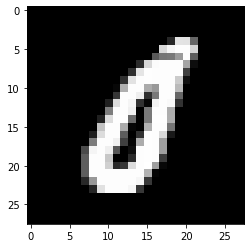

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 039 227 226 102 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 217 245 253 253 213 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 090 117 120 154 253 093 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 043 215 251 253 253 253 165 013 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 047 229 254 253 253 253 253 066 000 000 000 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

im = np.random.randint(0,x_train.shape[0])
plt.imshow(x_train[im],cmap='gray')
print('Class:',y_train[im])
plt.show()

for i in range(28):
    for j in range(28):
        print(str(x_train[im,i,j]+1000)[1:],end=' ')
    print()

The algorithm is as follows:

```
Input: x_train, y_train, x_test
Output: pred - the predicted class for every example in x_test

for every x in x_test:
    find the distance from x to every instance in x_train
    find the k examples in x_train with smallest distance to x (the k-nearest neighbors)
    assign to prediction for x the most common value of y in the selected k neighbors
```



To evaluate the classifier's performance:



```
Accuracy = number of instances where x_test[i] == pred[i] divided by total number of test instances.
```



## **Pre-processing**

The learning algorithm requires the data to be provided as a pair (X,y), where each row in X represents a training example and each column represents a feature or attribute, in this case a pixel value. y is a 1D array where y[i] is the class or identity of example X[i].

Images are stored as unsigned 8-bit integers in the 0-255 range. Since we need to perform distance computations, we need to convert the data to floating point, otherwise we will obtain erroneous results. We will also scale the data to the [0,1] range to reduce the probability of errors due to rounding.

For development purposes, we might want to work with only a fraction of the dataset. 



*  Convert x_train and x_test to 2D
*  Convert data to floating point and divide by 255
*  Subsample, choosing only every fifth training and test example


In [ ]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)
print(x_test.shape)
print(type(x_train[0,0]))

(60000, 784)
(10000, 784)
<class 'numpy.uint8'>


In [ ]:
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255
print(x_train.shape)
print(x_test.shape)
print(type(x_train[0,0]))

(60000, 784)
(10000, 784)
<class 'numpy.float32'>


In [ ]:
step = 5
x_train = x_train[::step]
y_train = y_train[::step]
x_test = x_test[::step]
y_test = y_test[::step]
print(x_train.shape)
print(x_test.shape)

(12000, 784)
(2000, 784)


In [ ]:
print(x_train.shape)
print(x_test.shape)

(12000, 784)
(2000, 784)


## **Version 1**

Given two images **p** and **q**, we need to find their Euclidean distance.  

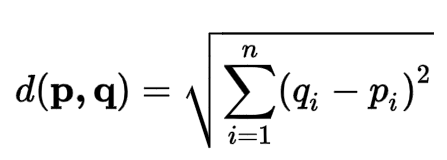

Recall that the k-nearest neighbors of a test image q are the k training examples with smallest distance to q

In [ ]:
def distance(p,q):
    # Return Euclidean distance between image p and image q
    return np.sqrt(np.sum(np.square(p-q)))

In [ ]:
def most_common(labels):
    # Returns the most common element in labels
    count = np.zeros(np.amax(labels)+1,dtype=np.int32)
    for c in labels:
        count[c] +=1
    return np.argmax(count)

In [ ]:
def accuracy(p,y):
    return np.mean(p==y)

In [ ]:
def knn(x_train, y_train, x_test, k):
    # Returns predicted class for examples in x_test
    pred = np.zeros(x_test.shape[0],dtype=int)
    d = np.zeros(x_train.shape[0],dtype=np.float32)
    for i in range(x_test.shape[0]):
        for j in range(x_train.shape[0]):
            d[j] = distance(x_test[i],x_train[j]) 
        neighbors = np.argsort(d)[:k]
        #print(neighbors,y_train[neighbors])
        pred[i] = most_common(y_train[neighbors])
    return pred

In [ ]:
pred = knn(x_train, y_train, x_test[:10], 7)

[ 7724  3052  7279  2954 10402  2901  8142] [7 7 7 7 7 7 7]
[10380  1963  2996  3976   574  8741  8044] [1 1 1 1 1 1 1]
[  306  2822  1807  9963  1650  2964 10924] [0 0 0 0 0 0 0]
[ 8228  4273  9838  8764  5016 11196  1664] [5 5 5 5 5 5 5]
[ 4571  3201  8321   379  7017  4965 10787] [9 9 9 9 9 9 9]
[1597 4179 5625 5677 1213 5386 7136] [0 0 0 0 0 0 0]
[ 1646 10931  7858  3757  1430  7407  7371] [3 3 3 3 3 3 3]
[ 1321  5812  9710  4192  1293  9141 10362] [2 2 2 2 2 2 2]
[10868   646  8218  9516  7584 11548  6917] [1 1 1 1 1 1 1]
[6583 9258 4978 2122 1548 3298 1960] [5 5 5 5 5 5 5]


In [ ]:
print(accuracy(pred,y_test[:10]))

Now let's examine the accuracy and running times for various test set sizes.

In [ ]:
import time

n = 100
start = time.time()
pred = knn(x_train, y_train, x_test[:n], 3)
elapsed_time = time.time() - start
print('Test set size =',n)
print('Accuracy = {:.4f}'.format(accuracy(pred,y_test[:n])))
print('Elapsed time = {:.4f} secs'.format(elapsed_time))

Test set size = 100
Accuracy = 0.9100
Elapsed time = 15.5915 secs


As you can see, accuracy is good, but execution is very slow, mostly due to the nested loops.

## **Version 2**

We can avoid looping through the training set using broadcasting.

Recall that if we perform an operation between a 1-by-n array (a single row) and an m-by-n array, the 1-by-n array will be subtracted from every row of the m-by-n array.

In [ ]:
a = np.random.randint(0,5,size=(4))
b = np.random.randint(0,5,size=(6,4))
print('a=',a)
print('b=',b)
print('a+b=',a+b)

a= [4 0 0 1]
b= [[3 1 1 1]
 [2 4 4 4]
 [2 2 2 0]
 [1 1 0 4]
 [0 0 1 3]
 [2 1 2 4]]
a+b= [[7 1 1 2]
 [6 4 4 5]
 [6 2 2 1]
 [5 1 0 5]
 [4 0 1 4]
 [6 1 2 5]]


Also, recall that the sum operation in numpy can be used to perform sums along the rows or columns of an array.

The following code shows the computation of the euclidean distance from an example a, described by a 1D array, and ALL the examples in the training set B, represented by a 2D array.

In [ ]:
a = np.random.randint(0,8,size=(4))
B= np.random.randint(0,8,size=(6,4))
print('a=',a)
print('B=',B)
d = a-B
print('a-B=',a-B)
print('(a-B)**2=',(a-B)**2)
print('(dist(a-B))**2=',np.sum((a-B)**2,axis=1))
d = np.sqrt(np.sum((a-B)**2,axis=1))
print('dist(a-B)=',d)
print('The nearest neighbor of',a)
print('is',B[np.argmin(d)])


a= [7 2 0 6]
B= [[3 1 2 0]
 [3 6 4 6]
 [4 3 6 0]
 [0 5 2 2]
 [1 1 1 2]
 [5 7 2 7]]
a-B= [[ 4  1 -2  6]
 [ 4 -4 -4  0]
 [ 3 -1 -6  6]
 [ 7 -3 -2  4]
 [ 6  1 -1  4]
 [ 2 -5 -2 -1]]
(a-B)**2= [[16  1  4 36]
 [16 16 16  0]
 [ 9  1 36 36]
 [49  9  4 16]
 [36  1  1 16]
 [ 4 25  4  1]]
(dist(a-B))**2= [57 48 82 78 54 34]
dist(a-B)= [7.54983444 6.92820323 9.05538514 8.83176087 7.34846923 5.83095189]
The nearest neighbor of [7 2 0 6]
is [5 7 2 7]


The following code implements the computation with a single loop.

In [ ]:
def distance(p,Q):
    # Return Euclidean distance between image p and image q
    return np.sqrt(np.sum(np.square(p-Q),axis=1))

We will also replace the search for the most common class among the neighbors by a more efficient implementation from the Scipy library wich returns the mode of an array.

In [ ]:
from scipy import stats

def most_common(labels):
    return stats.mode(labels,axis=0)[0][0]

In [ ]:
def knn(x_train, y_train, x_test, k):
    # Returns predicted class for examples in x_test
    pred = np.zeros(x_test.shape[0],dtype=int)
    for i in range(x_test.shape[0]):
        d = distance(x_test[i],x_train) 
        neighbors = np.argsort(d)[:k]
        pred[i] = most_common(y_train[neighbors])
    return pred

In [ ]:
import time

n = 2000
start = time.time()
pred = knn(x_train, y_train, x_test[:n], 3)
elapsed_time = time.time() - start
print('Test set size =',n)
print('Accuracy = {:.4f}'.format(accuracy(pred,y_test[:n])))
print('Elapsed time = {:.4f} secs'.format(elapsed_time))

Test set size = 2000
Accuracy = 0.9500
Elapsed time = 47.7474 secs


We can see that the accuracy does not change, but execution is much faster.

Can we speed up execution even more by removing the remaining loop in distance computation?

## **Version 3**

We can compute the distances from all training examples to all test examples without loops as follows.

We will build an array d such that d[i,j] contains the euclidean distance from x_train[i] to x_test[j] as follows:



Suppose A is the test set of shape (5,4) and B is the training set of shape (10,4). The d array described above has shape (5,10), where d[i,j] is the distance from A[i] to B[j].

Recall from algebra that (a-b)^2 = a^2 - 2ab + b^2

thus d[i,j] = sum((A[i] - B[j])^2) = sum(A[i]^2 - 2A[i]B[j] + B[j]^2) = sum(A[i]^2) - sum(2A[i]B[j]) + sum(B[j]^2)

thus d[i,j] = dot(A[i],A[i]) - 2*dot(A[i],B[j]) + dot(B[j],B[j])

And each of the three parts of the equation can be computed without loops, thus we can do 

d = dot(A,A) - 2*dot(A,B) + dot(B,B)




In [ ]:
A = np.random.randint(0,8,size=(5,4))
B = np.random.randint(0,8,size=(10,4))

print('A=',A)
print('B=',B)

d = np.sum(A**2,axis=1).reshape(-1,1) - 2*np.matmul(A,B.T) + np.sum(B.T**2,axis=0).reshape(1,-1)
d = np.sqrt(d)

print(d)

i,j = 3,5
print(d[i,j])
print(np.sqrt(np.sum((A[i]-B[j])**2)))

A= [[6 3 5 7]
 [0 1 4 2]
 [2 0 5 2]
 [4 6 3 1]
 [6 1 2 1]]
B= [[0 4 0 7]
 [3 2 2 3]
 [6 2 2 1]
 [7 5 5 0]
 [7 7 4 3]
 [0 3 6 0]
 [0 5 1 7]
 [4 2 5 1]
 [5 5 4 2]
 [5 4 7 4]]
[[7.87400787 5.91607978 6.78232998 7.34846923 5.83095189 9.2736185
  7.48331477 6.40312424 5.56776436 3.87298335]
 [7.07106781 3.87298335 6.4807407  8.36660027 9.2736185  3.46410162
  7.07106781 4.35889894 6.40312424 6.8556546 ]
 [8.36660027 3.87298335 5.47722558 7.34846923 8.71779789 4.24264069
  8.36660027 3.         5.91607978 5.74456265]
 [8.06225775 4.69041576 4.58257569 3.87298335 3.87298335 5.91607978
  7.54983444 4.47213595 2.         5.47722558]
 [9.21954446 3.74165739 1.         5.19615242 6.70820393 7.54983444
  9.43398113 3.74165739 4.69041576 6.63324958]]
5.916079783099616
5.916079783099616


In [ ]:
def distance(x_test,x_train):
    # Returns 2D array dist
    # where dist[i,j] is the Euclidean distance from training example i to test example j
    dist = np.sum(x_train**2,axis=1).reshape(-1,1) # dist = x_train**2
    dist = dist - 2*np.matmul(x_train,x_test.T)    # dist = X_train**2  - 2*X_train*X_test
    dist = dist + np.sum(x_test.T**2,axis=0).reshape(1,-1) # dist = X_train**2  - 2*X_train*X_test + X_test**2 - Not really necessary
    dist = np.sqrt(dist) 
    return  dist

In [ ]:
print(stats.mode(y_train[neighbors],axis=0)[0][0])

NameError: ignored

In [ ]:
def knn(x_train, y_train, x_test, k):
    d = distance(x_test,x_train) 
    neighbors = np.argsort(d,axis=0)[:k]
    pred = most_common(y_train[neighbors])
    return pred

In [ ]:
import time

n = 2000
start = time.time()
pred = knn(x_train, y_train, x_test[:n], 3)
elapsed_time = time.time() - start
print('Test set size =',n)
print('Accuracy = {:.4f}'.format(accuracy(pred,y_test[:n])))
print('Elapsed time = {:.4f} secs'.format(elapsed_time))

Test set size = 2000


NameError: ignored